## EDA and Experimentation on Door Dash Dataset

### Import necessary packages and download dataset from Kaggle

In [35]:
import os
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi


In [36]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

In [37]:
# Create the 'data' folder if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

In [38]:
# Download the dataset to the 'data' folder
api.dataset_download_files('dharun4772/doordash-eta-prediction', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction


### Create a Pandas Dataframe

In [39]:
# Path to the data folder
data_folder = 'data'

csv_file_path = os.path.join(data_folder, 'historical_data.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [40]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


## Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [42]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [43]:
# Check for missing values
print(df.isnull().sum())

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64


In [44]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

market_id                                       0.499929
created_at                                      0.000000
actual_delivery_time                            0.003546
store_id                                        0.000000
store_primary_category                          2.411006
order_protocol                                  0.503981
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_dashers                           8.236927
total_busy_dashers                              8.236927
total_outstanding_orders                        8.236927
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.266426
dtype: float64


In [45]:
#Create new feature: devlivery_duration

# Convert 'created_at' and 'actual_delivery_time' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Calculate delivery_duration in minutes
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Display the first few rows
print(df[['created_at', 'actual_delivery_time', 'delivery_duration']].head())


           created_at actual_delivery_time  delivery_duration
0 2015-02-06 22:24:17  2015-02-06 23:27:16          62.983333
1 2015-02-10 21:49:25  2015-02-10 22:56:29          67.066667
2 2015-01-22 20:39:28  2015-01-22 21:09:09          29.683333
3 2015-02-03 21:21:45  2015-02-03 22:13:00          51.250000
4 2015-02-15 02:40:36  2015-02-15 03:20:26          39.833333


In [46]:
df['delivery_duration'].describe()

count    197421.000000
mean         48.470956
std         320.493482
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max      141947.650000
Name: delivery_duration, dtype: float64

## View Delivery Duration Outliers

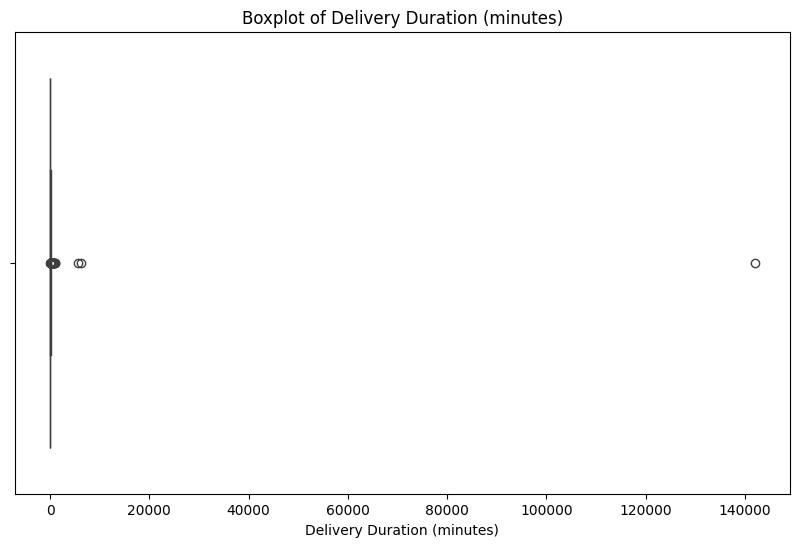

In [47]:
# Boxplot of delivery_duration to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delivery_duration'])
plt.title('Boxplot of Delivery Duration (minutes)')
plt.xlabel('Delivery Duration (minutes)')
plt.show()

## Remove Outliers

The max delivery duration is 141947 minutes, which is way to high. We will reduce the max duration by creating an upper and lower bound.

count    196331.000000
mean         47.097709
std          16.931243
min           1.683333
25%          35.016667
50%          44.216667
75%          56.083333
max         119.933333
Name: delivery_duration, dtype: float64
Lower Bound: 3.4166666666666607, Upper Bound: 87.68333333333334


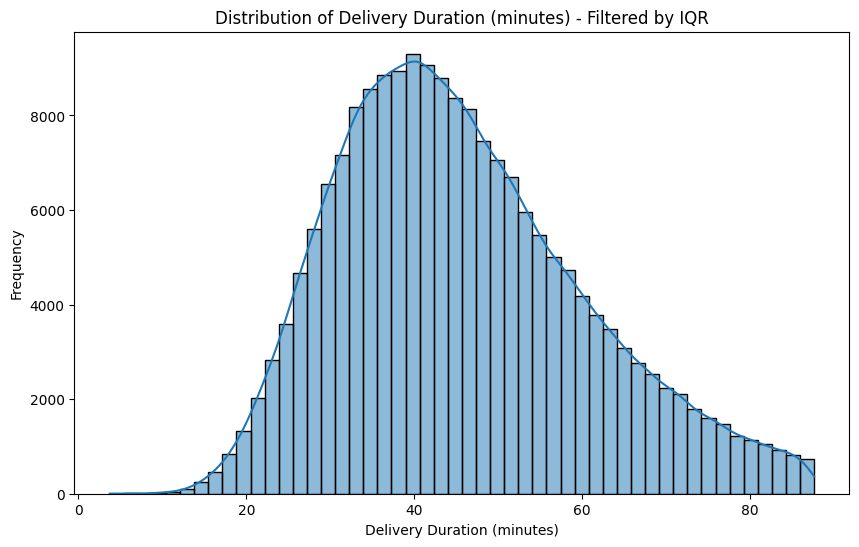

In [53]:
# Calculate summary statistics
summary_stats = df['delivery_duration'].describe()
print(summary_stats)

# Calculate the interquartile range (IQR)
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

# Filter out outliers
filtered_df = df[(df['delivery_duration'] >= lower_bound) & (df['delivery_duration'] <= upper_bound)]

df = filtered_df

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_duration'], bins=50, kde=True)
plt.title('Distribution of Delivery Duration (minutes) - Filtered by IQR')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [54]:
df['delivery_duration'].describe()

count    190912.000000
mean         45.641468
std          14.694914
min           3.716667
25%          34.750000
50%          43.700000
75%          54.800000
max          87.683333
Name: delivery_duration, dtype: float64